In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

In [66]:
df = pd.read_csv('population.csv')
df

,日付,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪難波,札幌大通,仙台駅,福岡天神
0,2020/1/1,40300,32800,81600,28900,6700,4600,32500,8200,14100,10900
1,2020/1/2,59500,60300,118000,36300,8600,7400,52200,22200,36300,32600
2,2020/1/3,70000,60100,120000,40200,8900,7000,56300,19600,33400,28200
3,2020/1/4,78100,64400,118000,40100,10600,8200,57400,21200,31600,28200
4,2020/1/5,64100,52500,103000,36600,9400,6400,44200,17900,24800,20800
...,...,...,...,...,...,...,...,...,...,...,...
626,2021/9/18,50700,38200,53000,20100,12000,4400,25500,11400,15000,11400
627,2021/9/19,62200,46900,59400,21800,15000,4900,30200,10100,16800,10200
628,2021/9/20,57300,43100,61200,23300,14800,4900,26500,9700,15500,9400
629,2021/9/21,66700,49900,88300,40000,16500,6100,31400,16800,19600,16100


In [67]:
df_tokyo = pd.read_csv('case.csv')
df_tokyo = df_tokyo[df_tokyo['Prefecture']=='Tokyo']
df_tokyo = df_tokyo.drop(columns="Prefecture", axis=1)
df_tokyo = df_tokyo[:-6]
df_tokyo

,日付,cases
13,2020/1/26,0
61,2020/1/27,0
109,2020/1/28,0
157,2020/1/29,0
205,2020/1/30,0
...,...,...
28861,2021/9/18,862
28909,2021/9/19,565
28957,2021/9/20,302
29005,2021/9/21,253


In [68]:
df_vac = pd.read_csv('vac.csv')
#df_vac = df_vac[df_vac['prefecture_name'] == '東京都']
df_vac = df_vac[:-6]
df_vac = df_vac.drop(columns='count_first_or_mid_general')
df_vac

,日付,count_second_or_full_general
0,2021/04/12,0
1,2021/04/13,0
2,2021/04/14,0
3,2021/04/15,0
4,2021/04/16,0
...,...,...
159,2021/09/18,664261
160,2021/09/19,535100
161,2021/09/20,139389
162,2021/09/21,584177


In [69]:
df_word = pd.read_csv('word.csv')
pd.set_option('display.max_columns', None)
df_word

,日付,渋谷＊,新宿＊,丸の内＊,品川＊,下北沢＊,八王子＊,大阪＊,札幌＊,仙台＊,福岡＊,東京 コロナ,コロナ 感染者数,コロナ ワクチン,コロナ 初期症状,コロナ 潜伏期間,緊急事態宣言,緊急事態宣言 東京,緊急事態宣言 再発令,緊急事態宣言とは,緊急事態宣言 解除,緊急事態宣言 仕事,大阪府 コロナウイルス感染者,大阪府 緊急事態宣言,北海道 コロナウイルス感染者,北海道 緊急事態宣言,宮城県 コロナウイルス感染者,宮城県 緊急事態宣言,福岡県 コロナウイルス感染者,福岡県 緊急事態宣言,デルタ株,ラムダ株,リモート とは,リモートワーク,リモート飲み会,居酒屋,飲み会,旅行,飲食店,営業時間,デリバリー,テイクアウト,コンビニ,マスク,アルコール,ランチ,美容院,カラオケ,温泉,チケット,新幹線,飛行機,レストラン,レシピ,動画,漫画,ゲーム,公園,自転車,台風,大雨
0,2020/1/1,2400,2700,160,260,330,1200,5400,3500,1600,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,380,30,1200,210,30,370,120,2100,250,250,250,510,2000,1700,450,3600,990,110,850,1300,3700,2400,180,1600,120,0
1,2020/1/2,1500,3400,230,260,390,1400,5800,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,800,10,1200,270,50,370,140,1400,310,140,470,790,2200,1700,510,4700,1000,150,960,1500,4100,2500,200,1800,230,0
2,2020/1/3,1900,3800,200,340,540,1400,6300,4000,2000,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,760,20,1300,230,70,480,140,1300,330,180,510,1000,2200,1800,520,5500,1100,130,1000,1700,4700,2200,300,2100,120,0
3,2020/1/4,1800,3600,200,350,660,1400,6500,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,810,20,1300,210,10,450,200,1300,790,240,560,1200,2100,1700,540,5700,1100,150,1100,1800,4500,2000,280,2400,110,0
4,2020/1/5,1400,2900,160,590,660,1400,6300,4000,1600,2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,100,0,560,20,1500,270,10,450,170,1300,520,200,500,1100,2100,1500,550,5300,1200,50,1200,1800,4600,1800,260,2500,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2021/9/18,820,1500,160,260,450,1500,1300,2400,620,910,62100,32400,16400,8900,3200,17100,600,30,20,570,0,240,50,20,430,50,190,11400,220,420,110,420,300,20,270,30,690,250,40,680,940,1100,3400,380,760,1500,1300,1000,600,6300,580,410,1400,2700,5300,2400,410,3100,63900,220
627,2021/9/19,820,1600,200,230,580,1600,1200,2400,560,840,57600,34000,14200,8500,2900,18700,680,10,30,860,0,260,100,20,370,40,150,13400,190,320,120,400,240,10,260,0,610,270,30,560,950,1100,3000,310,840,1300,1400,1000,340,2300,420,440,1200,2300,5000,2100,970,4000,6600,0
628,2021/9/20,770,1600,140,140,550,1600,1200,2200,500,760,52100,35800,13600,9500,3200,21900,930,0,40,1800,0,250,110,20,370,60,130,12500,170,460,130,470,290,20,220,20,630,240,20,700,720,1000,3100,390,840,1300,1200,1100,370,2400,540,400,1300,2400,4800,2300,840,4300,1900,0
629,2021/9/21,580,1100,160,140,610,1600,1200,2200,500,620,54400,36400,15700,9700,3400,24800,1300,0,20,2200,0,300,150,40,430,50,160,12500,260,490,120,470,350,0,230,10,560,260,70,390,380,970,3300,300,510,1200,790,640,310,1800,420,310,1100,2200,4200,1700,230,3300,2000,10


In [70]:
df = pd.merge(df, df_tokyo, on='日付')
df = pd.merge(df, df_word, on='日付')
df = pd.merge(df, df_vac, on='日付')
df

,日付,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪難波,札幌大通,仙台駅,福岡天神,cases,渋谷＊,新宿＊,丸の内＊,品川＊,下北沢＊,八王子＊,大阪＊,札幌＊,仙台＊,福岡＊,東京 コロナ,コロナ 感染者数,コロナ ワクチン,コロナ 初期症状,コロナ 潜伏期間,緊急事態宣言,緊急事態宣言 東京,緊急事態宣言 再発令,緊急事態宣言とは,緊急事態宣言 解除,緊急事態宣言 仕事,大阪府 コロナウイルス感染者,大阪府 緊急事態宣言,北海道 コロナウイルス感染者,北海道 緊急事態宣言,宮城県 コロナウイルス感染者,宮城県 緊急事態宣言,福岡県 コロナウイルス感染者,福岡県 緊急事態宣言,デルタ株,ラムダ株,リモート とは,リモートワーク,リモート飲み会,居酒屋,飲み会,旅行,飲食店,営業時間,デリバリー,テイクアウト,コンビニ,マスク,アルコール,ランチ,美容院,カラオケ,温泉,チケット,新幹線,飛行機,レストラン,レシピ,動画,漫画,ゲーム,公園,自転車,台風,大雨,count_second_or_full_general


In [ ]:
L = len(df)

word = np.array([df.iloc[:, 46]])
case = np.array([df.iloc[:, 12]])
pop = np.array([df.iloc[:, 1]])

# 入力データ、出力データ作成
word = pop.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）
case = case.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）
pop = word.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

word1 = pop[0:L-3, :]  # 予測対象日の3日前のデータ
case1 = case[0:L-3, :]  # 予測対象日の3日前のデータ
pop1 = word[0:L-3, :]  # 予測対象日の3日前のデータ
word2 = pop[1:L-2, :]  # 予測対象日の2日前のデータ
case2 = case[1:L-2, :]  # 予測対象日の2日前のデータ
pop2 = word[1:L-2, :]  # 予測対象日の2日前のデータ
word3 = pop[2:L-1, :]  # 予測対象日の前日データ
case3 = case[2:L-1, :]  # 予測対象日の前日のデータ
pop3 = word[2:L-1, :]  # 予測対象日の前日のデータ

X = np.concatenate([word1, case1, pop1, word2, case2, pop2, word3, case3, pop3], axis=1)
Y = pop[3:L, :]  # 予測対象日のデータ

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
print(X.shape)

X_train = X[:593, :, :]
X_test = X[593:, :, :]
Y_train = Y[:593, :]
Y_test = Y[593:, :]
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(1, 9), recurrent_activation='hard_sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)
Predict = model.predict(X_test, verbose=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Daichi\miniconda3\envs\keras-env\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-cd1a512ca695>", line 26, in <module>
    scaler.fit(X)
  File "C:\Users\Daichi\miniconda3\envs\keras-env\lib\site-packages\sklearn\preprocessing\_data.py", line 363, in fit
    return self.partial_fit(X, y)
  File "C:\Users\Daichi\miniconda3\envs\keras-env\lib\site-packages\sklearn\preprocessing\_data.py", line 398, in partial_fit
    force_all_finite="allow-nan")
  File "C:\Users\Daichi\miniconda3\envs\keras-env\lib\site-packages\sklearn\base.py", line 421, in _validate_data
    X = check_array(X, **check_params)
  File "C:\Users\Daichi\miniconda3\envs\keras-env\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Daichi\miniconda3\envs\keras-env\lib\site-packages\sklearn\utils\validatio

In [16]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:596,0])

Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[596:,0])

Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[596:,0])

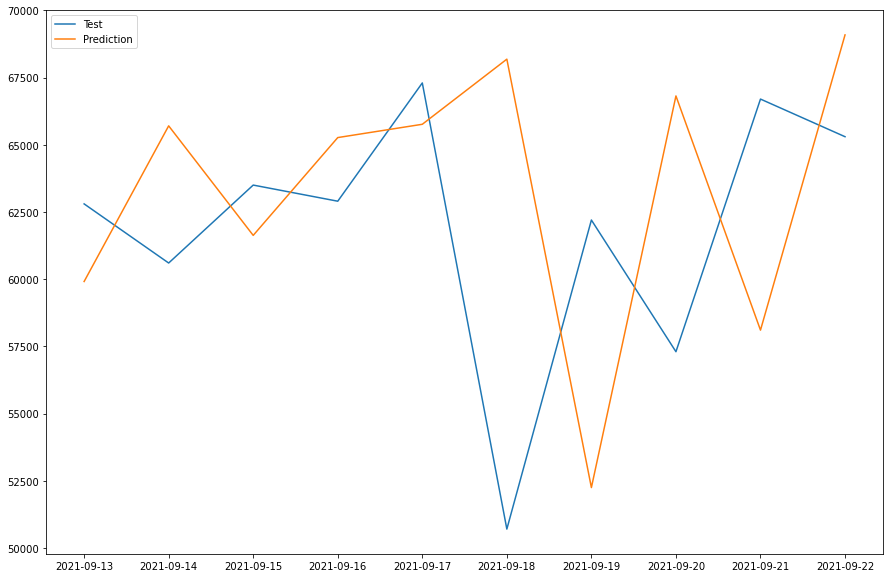

In [17]:
plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [18]:
Predict = np.array(Predict, dtype=int).T
a = np.abs(Y_test.values - Predict)/Y_test.values
np.mean(a)*100

9.171561123026489

In [ ]:
L = len(df)
Y = df.iloc[:, 1]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

# train, testデータを定義
X_train = X[:618, :, :]
X_test = X[618:, :, :]
Y_train = Y[:618, :]
Y_test = Y[618:, :]

model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)
Predict = model.predict(X_test)

# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:621,0])

Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[621:,0])

Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[621:,0])

plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

Epoch 1/100
 - 1s - loss: 0.6028 - mean_absolute_error: 0.7281
Epoch 2/100
 - 0s - loss: 0.4836 - mean_absolute_error: 0.6476
Epoch 3/100
 - 0s - loss: 0.3936 - mean_absolute_error: 0.5796
Epoch 4/100
 - 0s - loss: 0.3135 - mean_absolute_error: 0.5125
Epoch 5/100
 - 0s - loss: 0.2397 - mean_absolute_error: 0.4433
Epoch 6/100
 - 0s - loss: 0.1744 - mean_absolute_error: 0.3739
Epoch 7/100
 - 0s - loss: 0.1187 - mean_absolute_error: 0.3066
Epoch 8/100
 - 0s - loss: 0.0754 - mean_absolute_error: 0.2428
Epoch 9/100
 - 0s - loss: 0.0466 - mean_absolute_error: 0.1872
Epoch 10/100
 - 0s - loss: 0.0324 - mean_absolute_error: 0.1501
Epoch 11/100
 - 0s - loss: 0.0284 - mean_absolute_error: 0.1349
Epoch 12/100
 - 0s - loss: 0.0269 - mean_absolute_error: 0.1297
Epoch 13/100
 - 0s - loss: 0.0256 - mean_absolute_error: 0.1265
Epoch 14/100
 - 0s - loss: 0.0244 - mean_absolute_error: 0.1228
Epoch 15/100
 - 0s - loss: 0.0234 - mean_absolute_error: 0.1209
Epoch 16/100
 - 0s - loss: 0.0224 - mean_absolute